# Análisis de Datos: Supermercado

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
# Importacion de datos a DF
compras = pd.DataFrame(pd.read_csv('./Compras.csv'))
print(compras.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             1210 non-null   object 
 1   Nombre Productos  1210 non-null   object 
 2   Cantidad          1210 non-null   float64
 3   Precios           1203 non-null   object 
dtypes: float64(1), object(3)
memory usage: 37.9+ KB
None


## Data Profiling

In [2]:
compras['Fecha']= pd.to_datetime(compras['Fecha'])
compras['Precios'] = compras['Precios'].replace(
    '[\$,]', '', regex=True).astype(float)
print(compras.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             1210 non-null   datetime64[ns]
 1   Nombre Productos  1210 non-null   object        
 2   Cantidad          1210 non-null   float64       
 3   Precios           1203 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 37.9+ KB
None


In [3]:
# Lista completa de items + Cantidad
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(compras.groupby(compras["Nombre Productos"]).sum())


                                                    Cantidad       Precios
Nombre Productos                                                          
Aceite Fritolim Clasico Antiad Fritolim Aer 120...     12.00      21.41046
Aceite Fritolim Manteca 120 Gr Fritolim Aer .12...     12.00      17.84205
Aceite Girasol Lira Botella 1.5 L                      18.00  383614.00000
Aceite Girasol Lira Botella 900 Ml                     10.00  162960.00000
Aceite Girasol PUREZA Botella 1.5 L                     4.00  110524.00000
Aceite Girasol PUREZA Botella 900 Ml                   25.00  352908.00000
Aceite Girasol Plus Omega 9 Cocinero Bot 1.5 Ltr        2.00   42827.00000
Aceite Mezcla Girasol Y Oliva NATURA Botella 1.5 L      2.00   83075.00000
Aceite Oliva Extra Virgen CAÑUELAS Clásico Bote...      1.00       1.70410
Aceite Oliva Extra Virgen CAÑUELAS Intenso Bote...      7.00       3.52662
Aceite Oliva Extra Virgen CAÑUELAS Suave Botell...     10.00       6.81640
Aceite Oliva Extra Virgen

## Lista Completa

In [4]:
datosNom = [] 
datosCantxEnv = []
datosMed = []
datosCat = []

# Aceite de Girasol
AceiteGirasol900 = compras.groupby(compras['Nombre Productos'].str.contains('Aceite Girasol') & compras['Nombre Productos'].str.contains('900')).sum().reset_index()
datosNom.append("Aceite Girasol")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((AceiteGirasol900.iloc[1,1]*0.9))
AceiteGirasol1500 = compras.groupby(compras['Nombre Productos'].str.contains('Aceite Girasol') & compras['Nombre Productos'].str.contains('1.5')).sum().reset_index()
datosNom.append("Aceite Girasol")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((AceiteGirasol1500.iloc[1,1]*1.5))

# Aceite de Oliva
AceiteOliva500 = compras.groupby(compras['Nombre Productos'].str.contains('Aceite Oliva') & compras['Nombre Productos'].str.contains('500')).sum().reset_index()
datosNom.append("Aceite Oliva")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((AceiteOliva500.iloc[1,1]*0.5))

# Aceto
Aceto500 = compras.groupby(compras['Nombre Productos'].str.contains('Aceto') & compras['Nombre Productos'].str.contains('500')).sum().reset_index()
datosNom.append("Aceto")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((Aceto500.iloc[1,1]*0.5))
Aceto250 = compras.groupby(compras['Nombre Productos'].str.contains('Aceto') & compras['Nombre Productos'].str.contains('250')).sum().reset_index()
datosNom.append("Aceto")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((Aceto250.iloc[1,1]*0.25))

# Acondicionador
Acondicionador = compras.groupby(compras['Nombre Productos'].str.contains('Acondicionador')).sum().reset_index()
datosNom.append("Acondicionador")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((Acondicionador.iloc[1, 1]*1))

# Azucar
azucar = compras.groupby(compras['Nombre Productos'].str.contains('Azúcar Superior')).sum().reset_index()
datosNom.append("Azucar")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((azucar.iloc[1, 1]*1))

# Agua Mineral
Agua2l = compras.groupby(compras['Nombre Productos'].str.contains('Agua') & compras['Nombre Productos'].str.contains('2')).sum().reset_index()
datosNom.append("Agua Mineral")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((Agua2l.iloc[1,1]*2))
Agua15l = compras.groupby(compras['Nombre Productos'].str.contains('Agua') & compras['Nombre Productos'].str.contains('Sin Gas')).sum().reset_index()
datosNom.append("Agua Mineral")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((Agua15l.iloc[1,1]*1.5))

# Arroz
Arroz1k = compras.groupby(compras['Nombre Productos'].str.contains('Arroz') & compras['Nombre Productos'].str.contains('1')).sum().reset_index()
datosNom.append("Arroz")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Arroz1k.iloc[1,1]*1))
Arroz500g = compras.groupby(compras['Nombre Productos'].str.contains('Arroz') & compras['Nombre Productos'].str.contains('500')).sum().reset_index()
datosNom.append("Arroz")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Arroz500g.iloc[1,1]*0.5))

# Bicarbonato
Bicarbonato = compras.groupby(compras['Nombre Productos'].str.contains('Bicarbonato')).sum().reset_index()
datosNom.append("Bicarbonato")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Bicarbonato.iloc[1,1]*1))

# Bolsas de Basura
Bolsas45x60 = compras.groupby(compras['Nombre Productos'].str.contains('Bolsas') & compras['Nombre Productos'].str.contains('45 X 60')).sum().reset_index()
datosNom.append("Bolsas Residuos 45 X 60")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Bolsas45x60.iloc[1, 1]*1))
Bolsas80x110 = compras.groupby(compras['Nombre Productos'].str.contains('Bolsas') & compras['Nombre Productos'].str.contains('80 X 110')).sum().reset_index()
datosNom.append("Bolsas Residuos 80 X 110")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Bolsas80x110.iloc[1, 1]*1))
Bolsas34x38 = compras.groupby(compras['Nombre Productos'].str.contains('Bolsas') & compras['Nombre Productos'].str.contains('34 X 38')).sum().reset_index()
datosNom.append("Bolsas Residuos 34 X 38")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Bolsas34x38.iloc[1, 1]*1))
Bolsas50x70 = compras.groupby(compras['Nombre Productos'].str.contains('Bolsas') & compras['Nombre Productos'].str.contains('50 X 70')).sum().reset_index()
datosNom.append("Bolsas Residuos 50 X 70")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Bolsas50x70.iloc[1, 1]*1))

# Bolsas de Freezer
BolsasFreezer = compras.groupby(compras['Nombre Productos'].str.contains('Bolsa Freezer')).sum().reset_index()
datosNom.append("Bolsas Freezer")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((BolsasFreezer.iloc[1, 1]*20))

# Bolsas Ziploc
BolsasZiploc = compras.groupby(compras['Nombre Productos'].str.contains('Bolsas Herméticas ZIPLOC')).sum().reset_index()
datosNom.append("Bolsas Ziploc Pack")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((BolsasZiploc.iloc[1, 1]*1))

# Cafe Instantaneo Suave
cafeSuave = compras.groupby(compras['Nombre Productos'].str.contains('Cafe Instantaneo')).sum().reset_index()
datosNom.append("Cafe Instantaneo Suave")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((cafeSuave.iloc[1, 1]*1))

# Caldos
caldoVerdura = compras.groupby(compras['Nombre Productos'].str.contains('Caldo') & compras['Nombre Productos'].str.contains('Verduras')).sum().reset_index()
datosNom.append("Caldo Verduras")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((caldoVerdura.iloc[1, 1]*1))
caldoCarne = compras.groupby(compras['Nombre Productos'].str.contains('Caldo') & compras['Nombre Productos'].str.contains('Carne')).sum().reset_index()
datosNom.append("Caldo Carne")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((caldoCarne.iloc[1, 1]*1))
caldoGallina = compras.groupby(compras['Nombre Productos'].str.contains('Caldo') & compras['Nombre Productos'].str.contains('Gallina')).sum().reset_index()
datosNom.append("Caldo Gallina")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((caldoGallina.iloc[1, 1]*1))

# Choclo en Lata
ChocloLata = compras.groupby(compras['Nombre Productos'].str.contains('Choclo') & compras['Nombre Productos'].str.contains('Lata')).sum().reset_index()
datosNom.append("Choclo en Lata")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((ChocloLata.iloc[1, 1]*1))

# Crema Dental
CremaDental = compras.groupby(compras['Nombre Productos'].str.contains('Crema Dental')).sum().reset_index()
datosNom.append("Pasta de Dientes - Colgate")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((CremaDental.iloc[1, 1]*1))

# Crema de Leche
cremaBati500 = compras.groupby(compras['Nombre Productos'].str.contains(
'Crema Leche') & compras['Nombre Productos'].str.contains('Bati') & compras['Nombre Productos'].str.contains('520')).sum().reset_index()
datosNom.append("Crema para Batir")
datosMed.append("L")
datosCat.append("Super")
datosCantxEnv.append((cremaBati500.iloc[1, 1]*0.5))
cremaBati330 = compras.groupby(compras['Nombre Productos'].str.contains(
'Crema Leche') & compras['Nombre Productos'].str.contains('Bati') & compras['Nombre Productos'].str.contains('330')).sum().reset_index()
datosNom.append("Crema para Batir")
datosMed.append("L")
datosCat.append("Super")
datosCantxEnv.append((cremaBati330.iloc[1, 1]*0.33))
cremaCoc500 = compras.groupby(compras['Nombre Productos'].str.contains(
'Crema Leche') & compras['Nombre Productos'].str.contains('Coc') & compras['Nombre Productos'].str.contains('520')).sum().reset_index()
datosNom.append("Crema para Cocinar")
datosMed.append("L")
datosCat.append("Super")
datosCantxEnv.append((cremaCoc500.iloc[1, 1]*0.5))
cremaCoc330 = compras.groupby(compras['Nombre Productos'].str.contains(
'Crema Leche') & compras['Nombre Productos'].str.contains('Coc') & compras['Nombre Productos'].str.contains('330')).sum().reset_index()
datosNom.append("Crema para Cocinar")
datosMed.append("L")
datosCat.append("Super")
datosCantxEnv.append((cremaCoc330.iloc[1, 1]*0.33))

# Chocolate Aguila
chocoAguila225 = compras.groupby(compras['Nombre Productos'].str.contains('Aguila') & compras['Nombre Productos'].str.contains('225')).sum().reset_index()
datosNom.append("Chocolate Aguila")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((chocoAguila225.iloc[1, 1]*0.225))
chocoAguila100 = compras.groupby(compras['Nombre Productos'].str.contains('Aguila') & compras['Nombre Productos'].str.contains('100')).sum().reset_index()
datosNom.append("Chocolate Aguila")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((chocoAguila100.iloc[1, 1]*0.225))

# Detergente
detergente500 = compras.groupby(compras['Nombre Productos'].str.contains('Detergente') & compras['Nombre Productos'].str.contains('500')).sum().reset_index()
datosNom.append("Detergente")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((detergente500.iloc[1, 1]*0.5))
detergente450 = compras.groupby(compras['Nombre Productos'].str.contains('Detergente|Lavavajillas') & compras['Nombre Productos'].str.contains('450')).sum().reset_index()
datosNom.append("Detergente")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((detergente450.iloc[1, 1]*0.450))
detergente900 = compras.groupby(compras['Nombre Productos'].str.contains('Detergente|Lavavajillas') & compras['Nombre Productos'].str.contains('900')).sum().reset_index()
datosNom.append("Detergente")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((detergente900.iloc[1, 1]*0.900))
detergente750 = compras.groupby(compras['Nombre Productos'].str.contains('Detergente|Lavavajillas') & compras['Nombre Productos'].str.contains('750')).sum().reset_index()
datosNom.append("Detergente")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((detergente750.iloc[1, 1]*0.750))
detergente1400 = compras.groupby(compras['Nombre Productos'].str.contains('Detergente') & compras['Nombre Productos'].str.contains('1.4')).sum().reset_index()
datosNom.append("Detergente")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((detergente1400.iloc[1, 1]*1.4))

# Dulce de Leche
ddl1k = compras.groupby(compras['Nombre Productos'].str.contains('Dulce De Leche') & compras['Nombre Productos'].str.contains('Colonial')).sum().reset_index()
datosNom.append("Dulce de Leche")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((ddl1k.iloc[1, 1]*1))

# Dulce de Leche Repostero
ddlrep = compras.groupby(compras['Nombre Productos'].str.contains('Dulce De Leche') & compras['Nombre Productos'].str.contains('Rep')).sum().reset_index()
datosNom.append("Dulce de Leche Repostero")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((ddlrep.iloc[1, 1]*1))

# Espagueti
espgu = compras.groupby(compras['Nombre Productos'].str.contains('Espagueti')).sum().reset_index()
datosNom.append("Espagueti")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((espgu.iloc[1, 1]*1))

# Esponja
esponjaMor = compras.groupby(compras['Nombre Productos'].str.contains('Esponja') & compras['Nombre Productos'].str.contains('MORTIMER')).sum().reset_index()
datosNom.append("Esponja Cuadriculada")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((esponjaMor.iloc[1, 1]*1))

# Guantes
Guante = compras.groupby(compras['Nombre Productos'].str.contains('Guante')).sum().reset_index()
datosNom.append("Guantes Limpieza")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Guante.iloc[1, 1]*1))

# Harina 0000
Harina0000 = compras.groupby(compras['Nombre Productos'].str.contains('Harina 0000')).sum().reset_index()
datosNom.append("Harina 0000")
datosMed.append("Kg")
datosCat.append("Super")
datosCantxEnv.append((Harina0000.iloc[1, 1]*1))

# Harina Integral
HarinaIntegral = compras.groupby(compras['Nombre Productos'].str.contains('Harina') & compras['Nombre Productos'].str.contains('Integral')).sum().reset_index()
datosNom.append("Harina Integral")
datosMed.append("Kg")
datosCat.append("Super")
datosCantxEnv.append((HarinaIntegral.iloc[1, 1]*1))

# Harina Leudante
HarinaLeudante = compras.groupby(compras['Nombre Productos'].str.contains('Harina') & compras['Nombre Productos'].str.contains('Leudante')).sum().reset_index()
datosNom.append("Harina Leudante")
datosMed.append("Kg")
datosCat.append("Super")
datosCantxEnv.append((HarinaLeudante.iloc[1, 1]*1))

# Huevos
Huevos12 = compras.groupby(compras['Nombre Productos'].str.contains('Huevo') & compras['Nombre Productos'].str.contains('12')).sum().reset_index()
datosNom.append("Huevo")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((Huevos12.iloc[1, 1]*12))
Huevos30 = compras.groupby(compras['Nombre Productos'].str.contains('Huevo') & compras['Nombre Productos'].str.contains('30')).sum().reset_index()
datosNom.append("Huevo")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((Huevos30.iloc[1, 1]*30*2))

# Jabon en Pan
JabonPan = compras.groupby(compras['Nombre Productos'].str.contains('Jabon|Jabón') & compras['Nombre Productos'].str.contains('Pan')).sum().reset_index()
datosNom.append("Jabon en Pan Limpieza")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((JabonPan.iloc[1, 1]*1))

# Jabon Tocador
JabonTocador = compras.groupby(compras['Nombre Productos'].str.contains('Jabon') & compras['Nombre Productos'].str.contains('Tocador')).sum().reset_index()
datosNom.append("Jabon Tocador")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((JabonTocador.iloc[1, 1]*1))

# Jamon Cocido
JamonCocido = compras.groupby(compras['Nombre Productos'].str.contains('Jamon Cocido') & compras['Nombre Productos'].str.contains('130')).sum().reset_index()
datosNom.append("Jamon Cocido")
datosMed.append("Kg")
datosCat.append("Super")
datosCantxEnv.append((JamonCocido.iloc[1, 1]*0.130))

# Jugo Cepita de Berni 
JugoBerni = compras.groupby(compras['Nombre Productos'].str.contains('CEPITA DEL VALLE')).sum().reset_index()
datosNom.append("Jugito Cepita del Valle")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((JugoBerni.iloc[1, 1]*1))

# Ketchup
Ketchup250 = compras.groupby(compras['Nombre Productos'].str.contains('Ketchup') & compras['Nombre Productos'].str.contains('250')).sum().reset_index()
datosNom.append("Ketchup")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Ketchup250.iloc[1, 1]*0.250))
Ketchup400 = compras.groupby(compras['Nombre Productos'].str.contains('Ketchup') & compras['Nombre Productos'].str.contains('400')).sum().reset_index()
datosNom.append("Ketchup")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Ketchup400.iloc[1, 1]*0.4))
Ketchup500 = compras.groupby(compras['Nombre Productos'].str.contains('Ketchup') & compras['Nombre Productos'].str.contains('500')).sum().reset_index()
datosNom.append("Ketchup")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Ketchup500.iloc[1, 1]*0.5))

# Lavandina en Gel
LavandinaGel700 = compras.groupby(compras['Nombre Productos'].str.contains('Lavandina En Gel') & compras['Nombre Productos'].str.contains('700')).sum().reset_index()
datosNom.append("Lavandina en Gel")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((LavandinaGel700.iloc[1, 1]*0.7))
LavandinaGel450 = compras.groupby(compras['Nombre Productos'].str.contains('Lavandina En Gel') & compras['Nombre Productos'].str.contains('450')).sum().reset_index()
datosNom.append("Lavandina en Gel")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((LavandinaGel450.iloc[1, 1]*0.5))

# Leche
# Multiplicamos por 1.5 porque hubo que comprar en el almacen porque nos quedamos cortos varias veces.
Leche = compras.groupby(compras['Nombre Productos'].str.contains('Leche') & compras['Nombre Productos'].str.contains('Sachet')).sum().reset_index()
datosNom.append("Leche")
datosMed.append("L")
datosCat.append("Super")
datosCantxEnv.append((Leche.iloc[1, 1]*1.5))

# Levadura Seca
LevaduraSeca = compras.groupby(compras['Nombre Productos'].str.contains('Levadura Seca')).sum().reset_index()
datosNom.append("Levadura Seca")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((LevaduraSeca.iloc[1, 1]*1))

# Poett
LimpiadorPoett = compras.groupby(compras['Nombre Productos'].str.contains('POETT')).sum().reset_index()
datosNom.append("Limpiador Poett")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((LimpiadorPoett.iloc[1, 1]*4))

# Limpiador Antigrasa Cocina
LimpiadorAntigrasa = compras.groupby(compras['Nombre Productos'].str.contains('Antigrasa')).sum().reset_index()
datosNom.append("Limpiador Antigrasa MrMusculo")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((LimpiadorAntigrasa.iloc[1, 1]*0.5))

# Limpiador CIF
LimpiadorCIF = compras.groupby(compras['Nombre Productos'].str.contains('CIF|Cif') & compras['Nombre Productos'].str.contains('Crem')).sum().reset_index()
datosNom.append("Limpiador CIF")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((LimpiadorCIF.iloc[1, 1]*0.5))

# BLEM - Pisos Plastificados
LimpiadorBLEMPisos = compras.groupby(compras['Nombre Productos'].str.contains('Blem|BLEM') & compras['Nombre Productos'].str.contains('Plastificados')).sum().reset_index()
datosNom.append("Limpiador BLEM Pisos Plastificados")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((LimpiadorBLEMPisos.iloc[1, 1]*0.5))

# BLEM - Lustramuebles
LimpiadorBLEM = compras.groupby(compras['Nombre Productos'].str.contains('Blem|BLEM') & compras['Nombre Productos'].str.contains('Lustramuebles')).sum().reset_index()
datosNom.append("Lustramuebles BLEM")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((LimpiadorBLEM.iloc[1, 1]*0.5))

# Lysoform
lysoform = compras.groupby(compras['Nombre Productos'].str.contains('LYSOFORM')).sum().reset_index()
datosNom.append("Lysofrom")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((lysoform.iloc[1, 1]*1))

# Manteca
Manteca = compras.groupby(compras['Nombre Productos'].str.contains('Manteca')).sum().reset_index()
datosNom.append("Manteca")
datosMed.append("Kg")
datosCat.append("Super")
datosCantxEnv.append((Manteca.iloc[1, 1]*0.2))

# Mayonesa
Mayo950 = compras.groupby(compras['Nombre Productos'].str.contains('Mayonesa') & compras['Nombre Productos'].str.contains('950')).sum().reset_index()
datosNom.append("Mayonesa")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Mayo950.iloc[1,1]*0.95))
Mayo475 = compras.groupby(compras['Nombre Productos'].str.contains('Mayonesa') & compras['Nombre Productos'].str.contains('475')).sum().reset_index()
datosNom.append("Mayonesa")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Mayo475.iloc[1,1]*0.475))
Mayo320 = compras.groupby(compras['Nombre Productos'].str.contains('Mayonesa') & compras['Nombre Productos'].str.contains('320')).sum().reset_index()
datosNom.append("Mayonesa")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Mayo475.iloc[1, 1]*0.320))
Mayo320 = compras.groupby(compras['Nombre Productos'].str.contains('Mayonesa') & compras['Nombre Productos'].str.contains('237')).sum().reset_index()
datosNom.append("Mayonesa")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Mayo475.iloc[1, 1]*0.237))

# Mostaza
Mostaza500 = compras.groupby(compras['Nombre Productos'].str.contains('Mostaza') & compras['Nombre Productos'].str.contains('500')).sum().reset_index()
datosNom.append("Mostaza")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Mostaza500.iloc[1, 1]*0.5))
Mostaza250 = compras.groupby(compras['Nombre Productos'].str.contains('Mostaza') & compras['Nombre Productos'].str.contains('250')).sum().reset_index()
datosNom.append("Mostaza")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Mostaza250.iloc[1, 1]*0.25))

# Nutella
Nutella350 = compras.groupby(compras['Nombre Productos'].str.contains('Nutella') & compras['Nombre Productos'].str.contains('350')).sum().reset_index()
datosNom.append("Nutella")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Nutella350.iloc[1, 1]*0.350))
Nutella140 = compras.groupby(compras['Nombre Productos'].str.contains('Nutella') & compras['Nombre Productos'].str.contains('140')).sum().reset_index()
datosNom.append("Nutella")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Nutella140.iloc[1, 1]*0.350))

# Nesquik
Nesquik800 = compras.groupby(compras['Nombre Productos'].str.contains('Cacao En Polvo') & compras['Nombre Productos'].str.contains('800')).sum().reset_index()
datosNom.append("Nesquik")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Nesquik800.iloc[1, 1]*0.8))
Nesquik360 = compras.groupby(compras['Nombre Productos'].str.contains('Cacao En Polvo') & compras['Nombre Productos'].str.contains('360')).sum().reset_index()
datosNom.append("Nesquik")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Nesquik360.iloc[1, 1]*0.8))

# Pan
Pan = compras.groupby(compras['Nombre Productos'].str.contains('Pan') & compras['Nombre Productos'].str.contains('Artesano')).sum().reset_index()
datosNom.append("Pan")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((Pan.iloc[1, 1]*1))

# Papel Higienico
PapelHigienicoSimp = compras.groupby(compras['Nombre Productos'].str.contains('Papel Higiénico|P.Higienico') & compras['Nombre Productos'].str.contains('Simple')).sum().reset_index()
datosNom.append("Papel Higienico Simple Hoja")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((PapelHigienicoSimp.iloc[1, 1]*1))
PapelHigienicoDoble = compras.groupby(compras['Nombre Productos'].str.contains('Papel Higiénico|P.Higienico') & compras['Nombre Productos'].str.contains('Doble')).sum().reset_index()
datosNom.append("Papel Higienico Doble Hoja")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((PapelHigienicoDoble.iloc[1, 1]*1))

# Patitas
Patitas1100 = compras.groupby(compras['Nombre Productos'].str.contains('Patitas') & compras['Nombre Productos'].str.contains('1100')).sum().reset_index()
datosNom.append("Patitas")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Patitas1100.iloc[1, 1]*1.1))
Patitas400 = compras.groupby(compras['Nombre Productos'].str.contains('Patitas') & compras['Nombre Productos'].str.contains('400')).sum().reset_index()
datosNom.append("Patitas")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((Patitas400.iloc[1, 1]*0.4))

# Paño multiuso
PapelHigienicoDoble = compras.groupby(compras['Nombre Productos'].str.contains('Papel Higiénico|P.Higienico') & compras['Nombre Productos'].str.contains('Doble')).sum().reset_index()
datosNom.append("Papel Higienico Doble Hoja")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((PapelHigienicoDoble.iloc[1, 1]*1))

# Queso Untable Finlandia
QuesoUntable = compras.groupby(compras['Nombre Productos'].str.contains('Queso Unt') & compras['Nombre Productos'].str.contains('290')).sum().reset_index()
datosNom.append("Queso Untable")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((QuesoUntable.iloc[1, 1]*1))

# Queso Cremon 
QuesoCremon = compras.groupby(compras['Nombre Productos'].str.contains('Queso Cremon') & compras['Nombre Productos'].str.contains('SERENISIMA')).sum().reset_index()
datosNom.append("Queso Cremon")
datosMed.append("Kg")
datosCat.append("Super")
datosCantxEnv.append((QuesoCremon.iloc[1, 1]*1))

# Queso Casancrem Verde
CasancremVerde = compras.groupby(compras['Nombre Productos'].str.contains('Casancrem|CASANCREM') & compras['Nombre Productos'].str.contains('Queso Blanco')).sum().reset_index()
datosNom.append("Queso CASANCREM Verde")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((CasancremVerde.iloc[1, 1]*1))

# Queso Casancrem Rojo
CasancremRojo = compras.groupby(compras['Nombre Productos'].str.contains('Casancrem|CASANCREM') & compras['Nombre Productos'].str.contains('Queso Crema')).sum().reset_index()
datosNom.append("Queso CASANCREM Rojo")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((CasancremRojo.iloc[1, 1]*1))

# Queso Pategras
QuesoSandwich = compras.groupby(compras['Nombre Productos'].str.contains('Queso') & compras['Nombre Productos'].str.contains('Pategras')).sum().reset_index()
datosNom.append("Queso Sandwich Pategras")
datosMed.append("Kg")
datosCat.append("Super")
datosCantxEnv.append((QuesoSandwich.iloc[1, 1]*1))

# Queso Reggianito (Para Rallar)
QuesoRallar = compras.groupby(compras['Nombre Productos'].str.contains('Reggianito')).sum().reset_index()
datosNom.append("Queso para Rallar")
datosMed.append("Kg")
datosCat.append("Super")
datosCantxEnv.append((QuesoRallar.iloc[1, 1]*1))

# Rapiditas
Rapiditas = compras.groupby(compras['Nombre Productos'].str.contains('Rapiditas')).sum().reset_index()
datosNom.append("Rapiditas")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((Rapiditas.iloc[1, 1]*1))

# Rejilla
Rejillas = compras.groupby(compras['Nombre Productos'].str.contains('Rejilla')).sum().reset_index()
datosNom.append("Rejillas")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Rejillas.iloc[1, 1]*1))

# Rollo de Papel
RolloC = compras.groupby(compras['Nombre Productos'].str.contains('Rollo') & compras['Nombre Productos'].str.contains('Cocina')).sum().reset_index()
datosNom.append("Rollo de Cocina")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((RolloC.iloc[1, 1]*1))

# Sal Fina
SalFina = compras.groupby(compras['Nombre Productos'].str.contains('Sal Fina') & compras['Nombre Productos'].str.contains('500')).sum().reset_index()
datosNom.append("Sal Fina")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((SalFina.iloc[1, 1]*0.5))

# Sal Gruesa
SalGruesa = compras.groupby(compras['Nombre Productos'].str.contains('Sal Gruesa') & compras['Nombre Productos'].str.contains('1')).sum().reset_index()
datosNom.append("Sal Gruesa")
datosMed.append("Kg")
datosCat.append("Mayorista")
datosCantxEnv.append((SalGruesa.iloc[1, 1]*0.5))

# Salsa de Soja
SalsaSoja = compras.groupby(compras['Nombre Productos'].str.contains('Salsa De Soja')).sum().reset_index()
datosNom.append("Salsa De Soja")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((SalsaSoja.iloc[1, 1]*0.5))

# Salsa Filetto
Filetto = compras.groupby(compras['Nombre Productos'].str.contains('Filetto')).sum().reset_index()
datosNom.append("Salsa Filetto")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Filetto.iloc[1, 1]*1))

# Servilletas
Servilletas = compras.groupby(compras['Nombre Productos'].str.contains('Servilletas')).sum().reset_index()
datosNom.append("Servilletas")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Servilletas.iloc[1, 1]*1))

# Shampoo
Shampoo = compras.groupby(compras['Nombre Productos'].str.contains('Shampoo')).sum().reset_index()
datosNom.append("Shampoo")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((Shampoo.iloc[1, 1]*1))

# Skip
Skip = compras.groupby(compras['Nombre Productos'].str.contains('Skip')).sum().reset_index()
datosNom.append("Skip")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((Skip.iloc[1, 1]*3))

# Tapa De Empanadas
TapasEmpanadas = compras.groupby(compras['Nombre Productos'].str.contains(
'Tapas|Tap.') & compras['Nombre Productos'].str.contains('Empanada')).sum().reset_index()
datosNom.append("Tapas Empanadas")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((TapasEmpanadas.iloc[1, 1]*1))

# Te Green Hills Clasico
TeClasico = compras.groupby(compras['Nombre Productos'].str.contains(
'Te|Té') & compras['Nombre Productos'].str.contains('Clásico|Clasico')).sum().reset_index()
datosNom.append("Te Green Hills Clasico Cja Grande")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((TeClasico.iloc[1, 1]*1))

# Te Juan (Earl Grey / English Breakfast)
TeClasico = compras.groupby(compras['Nombre Productos'].str.contains('Te|Té') & compras['Nombre Productos'].str.contains('Earl Grey|Prince of Wales|Lady Grey|Frutilla')).sum().reset_index()
datosNom.append("Te Earl Grey / Prince of Wales")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((TeClasico.iloc[1, 1]*1))

# Trapo de piso
TrapoDePiso = compras.groupby(compras['Nombre Productos'].str.contains('Trapo') & compras['Nombre Productos'].str.contains('Piso')).sum().reset_index()
datosNom.append("Trapo De Piso")
datosMed.append("Cant")
datosCat.append("Mayorista")
datosCantxEnv.append((TrapoDePiso.iloc[1, 1]*1))

# Vivere
Vivere = compras.groupby(compras['Nombre Productos'].str.contains('Vivere')).sum().reset_index()
datosNom.append("Vivere")
datosMed.append("L")
datosCat.append("Mayorista")
datosCantxEnv.append((Vivere.iloc[1, 1]*3))

# Yogurt Griego
YogurtGriego = compras.groupby(compras['Nombre Productos'].str.contains('Yogur') & compras['Nombre Productos'].str.contains('Griego')).sum().reset_index()
datosNom.append("Yogur Griego")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((YogurtGriego.iloc[1, 1]*1))

# Yogurt Natural
YogurtNatural = compras.groupby(compras['Nombre Productos'].str.contains('Yogur') & compras['Nombre Productos'].str.contains('Natural')).sum().reset_index()
datosNom.append("Yogur Natural")
datosMed.append("Cant")
datosCat.append("Super")
datosCantxEnv.append((YogurtNatural.iloc[1, 1]*1))

# DF con nombre en columna 1, cantidad x Env columna 2  
dfdatos = pd.DataFrame({'Nombre':datosNom,
                        'Cantidad Total': datosCantxEnv,
                        'Medición': datosMed,
                        'Categoria': datosCat
                        })
ListaGeneral = dfdatos.groupby(by=['Nombre', 'Categoria', 'Medición']).sum().reset_index()
print(ListaGeneral)


                               Nombre  Categoria Medición  Cantidad Total
0                      Aceite Girasol  Mayorista        L           67.50
1                        Aceite Oliva  Mayorista        L           19.50
2                               Aceto  Mayorista        L            4.25
3                      Acondicionador  Mayorista        L            7.00
4                        Agua Mineral  Mayorista        L         2230.50
..                                ...        ...      ...             ...
74  Te Green Hills Clasico Cja Grande  Mayorista     Cant            2.00
75                      Trapo De Piso  Mayorista     Cant            8.00
76                             Vivere  Mayorista        L           15.00
77                       Yogur Griego      Super     Cant           50.00
78                      Yogur Natural      Super     Cant           17.00

[79 rows x 4 columns]


In [9]:
# More options can be specified also
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ListaGeneral)


                                Nombre  Categoria Medición  Cantidad Total
0                       Aceite Girasol  Mayorista        L          67.500
1                         Aceite Oliva  Mayorista        L          19.500
2                                Aceto  Mayorista        L           4.250
3                       Acondicionador  Mayorista        L           7.000
4                         Agua Mineral  Mayorista        L        2230.500
5                                Arroz  Mayorista       Kg          46.000
6                               Azucar  Mayorista       Kg          53.000
7                          Bicarbonato  Mayorista     Cant           8.000
8                       Bolsas Freezer  Mayorista     Cant         140.000
9              Bolsas Residuos 34 X 38  Mayorista     Cant           8.000
10             Bolsas Residuos 45 X 60  Mayorista     Cant           5.000
11             Bolsas Residuos 50 X 70  Mayorista     Cant          23.000
12            Bolsas Resi

## Busqueda de soluciones

### 1. Lista Mayorista: ¿Compra Semestral de 2023?

In [6]:
# Creamos lista mayorista a partir de la lista general
ListaMayorista = ListaGeneral[ListaGeneral["Categoria"].isin(['Mayorista'])]
# Para tener la primera compra semestral la cantidad total seria /2 
CompraSemestral = ListaMayorista
CompraSemestral["Cantidad Total"] = CompraSemestral["Cantidad Total"].div(2)
print(CompraSemestral)

                                Nombre  Categoria Medición  Cantidad Total
0                       Aceite Girasol  Mayorista        L          33.750
1                         Aceite Oliva  Mayorista        L           9.750
2                                Aceto  Mayorista        L           2.125
3                       Acondicionador  Mayorista        L           3.500
4                         Agua Mineral  Mayorista        L        1115.250
5                                Arroz  Mayorista       Kg          23.000
6                               Azucar  Mayorista       Kg          26.500
7                          Bicarbonato  Mayorista     Cant           4.000
8                       Bolsas Freezer  Mayorista     Cant          70.000
9              Bolsas Residuos 34 X 38  Mayorista     Cant           4.000
10             Bolsas Residuos 45 X 60  Mayorista     Cant           2.500
11             Bolsas Residuos 50 X 70  Mayorista     Cant          11.500
12            Bolsas Resi

<ipython-input-6-acb903dcbae7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CompraSemestral["Cantidad Total"] = CompraSemestral["Cantidad Total"].div(2)


### 2. Compra De Supermercado:
¿Cada cúanto hay que comprar?
¿Sirve el metodo semanal que usamos en 2022?

In [7]:
# Creamos lista mayorista a partir de la lista general
ListaSuper = ListaGeneral[ListaGeneral["Categoria"].isin(['Super'])]
# En 2022 compramos semanalmente en 35 oportunidades (sin contar los meses que vivimos afuera del pais)
CompraSuper = ListaSuper
#Suponiendo una compra cada 15 dias (serian la mitad que en 2022 redondeado)
CompraSuper["Cantidad Total"] = CompraSuper["Cantidad Total"].div(18)
print(CompraSuper)


                     Nombre Categoria Medición  Cantidad Total
20         Crema para Batir     Super        L        0.487222
21       Crema para Cocinar     Super        L        1.486667
28              Harina 0000     Super       Kg        6.500000
29          Harina Integral     Super       Kg        0.222222
30          Harina Leudante     Super       Kg        1.777778
31                    Huevo     Super     Cant       46.000000
34             Jamon Cocido     Super       Kg        0.483889
38                    Leche     Super        L       24.500000
46                  Manteca     Super       Kg        1.855556
51                      Pan     Super     Cant        6.333333
56     Queso CASANCREM Rojo     Super     Cant        1.333333
57    Queso CASANCREM Verde     Super     Cant        1.055556
58             Queso Cremon     Super       Kg        0.666667
59  Queso Sandwich Pategras     Super       Kg        0.208333
60            Queso Untable     Super     Cant        2

<ipython-input-7-c555cbf6c1b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CompraSuper["Cantidad Total"] = CompraSuper["Cantidad Total"].div(18)


### 3. ¿Cuántos articulos con categoria Mayorista vs Super? 

Articulos Compra en Mayorista:  59
Articulos Compra en Supermercado:  20


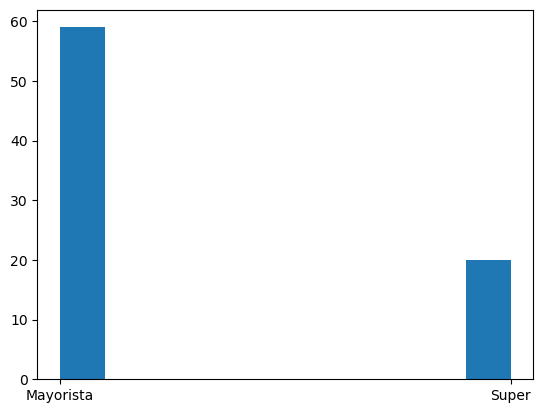

In [8]:
print("Articulos Compra en Mayorista: ", len(ListaMayorista))
print("Articulos Compra en Supermercado: ",len(ListaSuper))
plt.hist(ListaGeneral["Categoria"])
plt.show()


# Conclusiones
## Logros
#### - Scalp exitoso de un HTML caotico como es COTO DIGITAL
#### - Filtrado de productos consumidos en 2022 - ListaGeneral
#### - ListaMayorista - Obtención de lista mayorista para una compra semestral en base al consumo de 2022.
#### - ListaSuper - Obtención de Lista de supermercado para realizar cada 15 dias. 
## A futuro / Mejoras
#### - Este modelo no es escalable, el proceso de filtrado fue hecho a mano. El problema fue la falta de consistencia en el nombramiento de productos. Tenia variaciones hasta dentro de un mismo producto, muy dificil generar un filtro generalizable que sea confiable.
#### - Estas listas no tienen en cuenta las verduras ni la carne ya que se hacen por otros medios.
#### - Falta expansion en habitos de consumo en 2022. Hubo foco en tener armada la lista de compras para 2023, pero seria interesante hacer un deep dive en los habitos de consumo de la casa.
#### - Problema con el scalp de precios, el HTML de COTO es bastante caotico lo cual trajo problemas a la hora de extraer los precios. Tengo el precio por L / KG pero ante algunos items es bastante ilogico (desodorantes o pasta de dientes). 
#### - Ademas no son los precios de compra sino que los precios actuales de los productos y no sirve para evaluar la inflacion / aumento del costo de compra.